Read Combined Dataset that we built for Zillow based on Exploratory Analysis result with Values for each Year on  Combination of State and County Name for each of AllHomes, 3 Bed Room, 2 Bed Room, Condo , Percapita Income, Population Growth 

This dataset is input from Exploratory Analysis Result

In [51]:
import xgboost as xgb
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
dirpath = os.path.join(os.getcwd(), "DS_2025_TeamE\data_files")
# Check if directory exists
if not os.path.exists(dirpath):
    raise FileNotFoundError(f"The directory {dirpath} does not exist.")
else:
    print(f"The directory {dirpath} exists.")
    # List all files in the directory
files_in_dir = os.listdir(dirpath)
print(dirpath)
zhvi_filename = 'zillow_combined_zhvi.csv'
zhvi_filepath = os.path.join(dirpath, zhvi_filename)
zhvi_condo_df = pd.read_csv(zhvi_filepath, header=None)  # Read without headers
zhvi_condo_df.columns = zhvi_condo_df.iloc[0]  # Set first row as column names
zhvi_condo_df = zhvi_condo_df[1:].reset_index(drop=True)  # Remove first row from data
zhvi_condo_fmt_df = zhvi_condo_df.copy()


The directory c:\Users\req92163\OneDrive - Mutual of Omaha\DSCI8950\DS_2025_TeamE\data_files exists.
c:\Users\req92163\OneDrive - Mutual of Omaha\DSCI8950\DS_2025_TeamE\data_files


Impute Missing Values . For the ones where we do not have Annual Values ; then mask it as 90% of next year value .
If there are no next years where we have annual values ; then  compute the mean for the next years and make use of it. 
Make sure there is no data that has nulls after impute .

In [52]:
zhvi_condo_fmt_df = zhvi_condo_df.copy()
def impute_missing_values(df, column_name):
    for idx, row in df.iterrows():
        if pd.isnull(row[column_name]):
            state, county, year = row['State'], row['County'], row['Year_Recorded']
            future_values = df[(df['State'] == state) & (df['County'] == county) & (df['Year_Recorded'] > year)][column_name]
            if not future_values.dropna().empty:
                next_value = future_values.dropna().iloc[0]
                df.at[idx, column_name] = next_value * 0.9
            else:
                mean_value = df[(df['State'] == state) & (df['County'] == county)][column_name].mean()
                df.at[idx, column_name] = mean_value
    return df

# Ensure 'Personal_Income_Growth' is of numeric type before imputation
zhvi_condo_fmt_df['Personal_Income_Growth'] = pd.to_numeric(zhvi_condo_fmt_df['Personal_Income_Growth'], errors='coerce')
zhvi_condo_fmt_df['Population_Growth'] = pd.to_numeric(zhvi_condo_fmt_df['Population_Growth'], errors='coerce')
zhvi_condo_fmt_df['Per_Capita_Income_Growth'] = pd.to_numeric(zhvi_condo_fmt_df['Per_Capita_Income_Growth'], errors='coerce')
zhvi_condo_fmt_df['Annual_Increase_AllHomes'] = pd.to_numeric(zhvi_condo_fmt_df['Annual_Increase_AllHomes'], errors='coerce')
zhvi_condo_fmt_df['AnnualValue_AllHomes'] = pd.to_numeric(zhvi_condo_fmt_df['AnnualValue_AllHomes'], errors='coerce')
zhvi_condo_fmt_df['Previous_AnnualValue_AllHomes'] = pd.to_numeric(zhvi_condo_fmt_df['Previous_AnnualValue_AllHomes'], errors='coerce')

zhvi_condo_fmt_df['Annual_Increase_SingleFamily'] = pd.to_numeric(zhvi_condo_fmt_df['Annual_Increase_SingleFamily'], errors='coerce')
zhvi_condo_fmt_df['AnnualValue_SingleFamily'] = pd.to_numeric(zhvi_condo_fmt_df['AnnualValue_SingleFamily'], errors='coerce')
zhvi_condo_fmt_df['Previous_AnnualValue_SingleFamily'] = pd.to_numeric(zhvi_condo_fmt_df['Previous_AnnualValue_SingleFamily'], errors='coerce')

zhvi_condo_fmt_df['Annual_Increase_Condo'] = pd.to_numeric(zhvi_condo_fmt_df['Annual_Increase_Condo'], errors='coerce')
zhvi_condo_fmt_df['AnnualValue_Condo'] = pd.to_numeric(zhvi_condo_fmt_df['AnnualValue_Condo'], errors='coerce')
zhvi_condo_fmt_df['Previous_AnnualValue_Condo'] = pd.to_numeric(zhvi_condo_fmt_df['Previous_AnnualValue_Condo'], errors='coerce')

zhvi_condo_fmt_df['Annual_Increase_ThreeBedRoom'] = pd.to_numeric(zhvi_condo_fmt_df['Annual_Increase_ThreeBedRoom'], errors='coerce')
zhvi_condo_fmt_df['AnnualValue_ThreeBedRoom'] = pd.to_numeric(zhvi_condo_fmt_df['AnnualValue_ThreeBedRoom'], errors='coerce')
zhvi_condo_fmt_df['Previous_AnnualValue_ThreeBedRoom'] = pd.to_numeric(zhvi_condo_fmt_df['Previous_AnnualValue_ThreeBedRoom'], errors='coerce')

zhvi_condo_fmt_df['Annual_Increase_TwoBedRoom'] = pd.to_numeric(zhvi_condo_fmt_df['Annual_Increase_TwoBedRoom'], errors='coerce')
zhvi_condo_fmt_df['AnnualValue_TwoBedRoom'] = pd.to_numeric(zhvi_condo_fmt_df['AnnualValue_TwoBedRoom'], errors='coerce')
zhvi_condo_fmt_df['Previous_AnnualValue_TwoBedRoom'] = pd.to_numeric(zhvi_condo_fmt_df['Previous_AnnualValue_TwoBedRoom'], errors='coerce')

zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Personal_Income_Growth')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Population_Growth')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Per_Capita_Income_Growth')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Annual_Increase_AllHomes')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'AnnualValue_AllHomes')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Previous_AnnualValue_AllHomes')

zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Annual_Increase_SingleFamily')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'AnnualValue_SingleFamily')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Previous_AnnualValue_SingleFamily')

zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Annual_Increase_Condo')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'AnnualValue_Condo')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Previous_AnnualValue_Condo')

zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Annual_Increase_ThreeBedRoom')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'AnnualValue_ThreeBedRoom')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Previous_AnnualValue_ThreeBedRoom')

zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Annual_Increase_TwoBedRoom')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'AnnualValue_TwoBedRoom')
zhvi_condo_fmt_df = impute_missing_values(zhvi_condo_fmt_df, 'Previous_AnnualValue_TwoBedRoom')

zhvi_condo_fmt_df['Year_Recorded'] = zhvi_condo_fmt_df['Year_Recorded'].astype(int)
# Fill remaining null values with 0 for numeric columns
numeric_cols = zhvi_condo_fmt_df.select_dtypes(include=[np.number]).columns
zhvi_condo_fmt_df[numeric_cols] = zhvi_condo_fmt_df[numeric_cols].fillna(0)

# Verify if there are any remaining null values
zhvi_condo_fmt_df['Previous_AnnualValue_AllHomes'] = zhvi_condo_fmt_df['Previous_AnnualValue_AllHomes'].replace(0, np.nan)
zhvi_condo_fmt_df = zhvi_condo_fmt_df[['County', 'State', 'Year_Recorded', 
                                       'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                                       'AnnualValue_AllHomes', 'Previous_AnnualValue_AllHomes', 'Annual_Increase_AllHomes',
                                       'AnnualValue_SingleFamily', 'Previous_AnnualValue_SingleFamily','Annual_Increase_SingleFamily',
                                       'AnnualValue_Condo', 'Previous_AnnualValue_Condo', 'Annual_Increase_Condo',
                                       'AnnualValue_ThreeBedRoom', 'Previous_AnnualValue_ThreeBedRoom', 'Annual_Increase_ThreeBedRoom',
                                       'AnnualValue_TwoBedRoom', 'Previous_AnnualValue_TwoBedRoom', 'Annual_Increase_TwoBedRoom']]

zhvi_condo_fmt_df = zhvi_condo_fmt_df.dropna()
#print(zhvi_condo_fmt_df.isnull().sum())
zhvi_condo_fmt_df.isnull().sum()


0
County                               0
State                                0
Year_Recorded                        0
Personal_Income_Growth               0
Population_Growth                    0
Per_Capita_Income_Growth             0
AnnualValue_AllHomes                 0
Previous_AnnualValue_AllHomes        0
Annual_Increase_AllHomes             0
AnnualValue_SingleFamily             0
Previous_AnnualValue_SingleFamily    0
Annual_Increase_SingleFamily         0
AnnualValue_Condo                    0
Previous_AnnualValue_Condo           0
Annual_Increase_Condo                0
AnnualValue_ThreeBedRoom             0
Previous_AnnualValue_ThreeBedRoom    0
Annual_Increase_ThreeBedRoom         0
AnnualValue_TwoBedRoom               0
Previous_AnnualValue_TwoBedRoom      0
Annual_Increase_TwoBedRoom           0
dtype: int64

Build XGB Model .We need to predict prices for different categories i.e.  AllHomes, Single Family, Condo, Two Bedroom, Three Bedroom. 
So will take features i.e. personal Income Growth , Population Growth , Per Capita Income, Annual Increase Percent(for category), Previous Annual Value(for Category) 
Build Function that builds XGB Model for each category i.e. target_column. Perform Predictions on test dataset and write to dataframe.Return Model, Train , Test Features/Target columns along with Prediction results for each of category.

We are running models to predict values for AllHomes, SingleFamily, Condo, TwoBedRoom, ThreeBedRoom one after another.  

XGBOOST is highly popular and effective machine learning algorithm , particularly for regression tasks like house prediction .It handles non-linear relationships, Overfitting of data. It is more scalable and can handle null values. It produces highly predictive accurate results.

Implement Crossfold 5 Fold validation.

In [53]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

def prepare_and_train_xgb_model_with_cv(target_column):
    print("target column", target_column)
    if target_column == 'AnnualValue_AllHomes':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_AllHomes', 'Previous_AnnualValue_AllHomes']
    elif target_column == 'AnnualValue_SingleFamily':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_SingleFamily', 'Previous_AnnualValue_SingleFamily']
    elif target_column == 'AnnualValue_Condo':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_Condo', 'Previous_AnnualValue_Condo']
    elif target_column == 'AnnualValue_ThreeBedRoom':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_ThreeBedRoom', 'Previous_AnnualValue_ThreeBedRoom']
    elif target_column == 'AnnualValue_TwoBedRoom':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_TwoBedRoom', 'Previous_AnnualValue_TwoBedRoom']

    # Filter the data for training (years 2020 to 2023)
    train_df = zhvi_condo_fmt_df[(zhvi_condo_fmt_df['Year_Recorded'] < 2024) & (zhvi_condo_fmt_df[target_column] != 0)][features + [target_column, 'Year_Recorded']]
    # Create a test dataframe for prediction (year 2024)
    test_df = zhvi_condo_fmt_df[(zhvi_condo_fmt_df['Year_Recorded'] == 2024) & (zhvi_condo_fmt_df[target_column] != 0)][features + [target_column, 'Year_Recorded']].copy()
    test_df['Year_Recorded'] = 2025

    X_train, y_train = train_df[features], train_df[target_column]
    X_test, y_test = test_df[features], test_df[target_column]

    # Convert categorical features to numeric using one-hot encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    # Initialize the XGBoost Regressor
    xgb_model = xgb.XGBRegressor(
        subsample=0.8,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=0.8,
        random_state=42
    )

    # Implement K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
    cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
    print(f"Cross-Validation RMSE for {target_column}: {rmse_cv.mean():.4f} (± {rmse_cv.std():.4f})")

    # Train the model on the entire training set
    xgb_model.fit(X_train, y_train)

    # Prediction on test set
    y_pred = xgb_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"RMSE on test set for {target_column}: {rmse:.4f}")
    print(f"MAE on test set for {target_column}: {mae:.4f}")

    predictions_df = test_df.copy()
    predictions_df['Predicted_Value'] = y_pred

    return xgb_model, X_train, X_test, y_train, y_test, predictions_df

# Train and predict with cross-validation
xgb_model_allhomes, X_train_allhomes, X_test_allhomes, y_train_allhomes, y_test_allhomes, predictions_xgb_allhomes = prepare_and_train_xgb_model_with_cv('AnnualValue_AllHomes')
xgb_model_condo, X_train_condo, X_test_condo, y_train_condo, y_test_condo, predictions_xgb_condo = prepare_and_train_xgb_model_with_cv('AnnualValue_Condo')
xgb_model_singlefamily, X_train_singlefamily, X_test_singlefamily, y_train_singlefamily, y_test_singlefamily, predictions_xgb_singlefamily = prepare_and_train_xgb_model_with_cv('AnnualValue_SingleFamily')
xgb_model_twobedroom, X_train_twobedroom, X_test_twobedroom, y_train_twobedroom, y_test_twobedroom, predictions_xgb_twobedroom = prepare_and_train_xgb_model_with_cv('AnnualValue_TwoBedRoom')
xgb_model_threebedroom, X_train_threebedroom, X_test_threebedroom, y_train_threebedroom, y_test_threebedroom, predictions_xgb_threebedroom = prepare_and_train_xgb_model_with_cv('AnnualValue_ThreeBedRoom')

target column AnnualValue_AllHomes
Cross-Validation RMSE for AnnualValue_AllHomes: 21905.0418 (± 6986.7005)
RMSE on test set for AnnualValue_AllHomes: 41914.1318
MAE on test set for AnnualValue_AllHomes: 5047.8411
target column AnnualValue_Condo
Cross-Validation RMSE for AnnualValue_Condo: 11358.4406 (± 1632.3994)
RMSE on test set for AnnualValue_Condo: 19542.2736
MAE on test set for AnnualValue_Condo: 4492.4640
target column AnnualValue_SingleFamily
Cross-Validation RMSE for AnnualValue_SingleFamily: 35069.1807 (± 12576.6073)
RMSE on test set for AnnualValue_SingleFamily: 74336.4318
MAE on test set for AnnualValue_SingleFamily: 5847.1608
target column AnnualValue_TwoBedRoom
Cross-Validation RMSE for AnnualValue_TwoBedRoom: 11029.8905 (± 4787.8792)
RMSE on test set for AnnualValue_TwoBedRoom: 16067.8133
MAE on test set for AnnualValue_TwoBedRoom: 3272.1380
target column AnnualValue_ThreeBedRoom
Cross-Validation RMSE for AnnualValue_ThreeBedRoom: 27635.1811 (± 7337.8128)
RMSE on test se

Display few records with actual vs predicted values

In [54]:


# Rearrange the columns in the dataframe
predictions_xgb_allhomes[['County', 'State', 'Annual_Increase_AllHomes', 'AnnualValue_AllHomes', 'Predicted_Value', 
                     'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth','Previous_AnnualValue_AllHomes', 'Year_Recorded']].head(10)


,County,State,Annual_Increase_AllHomes,AnnualValue_AllHomes,Predicted_Value,Personal_Income_Growth,Population_Growth,Per_Capita_Income_Growth,Previous_AnnualValue_AllHomes,Year_Recorded
4,AUTAUGA,AL,4.00,"202,480.83","202,813.58",7.70,1.00,6.60,"194,390.83",2025
9,BALDWIN,AL,1.00,"349,517.88","352,100.19",8.80,2.80,5.80,"345,427.18",2025
14,BARBOUR,AL,2.00,"145,776.00","145,092.97",0.70,-0.50,1.20,"142,336.67",2025
19,BIBB,AL,3.00,"198,461.25","198,648.98",3.70,-0.50,4.30,"192,880.50",2025
24,BLOUNT,AL,3.00,"229,328.75","233,138.73",2.70,0.50,2.20,"222,670.75",2025
29,BULLOCK,AL,4.00,"98,247.00","98,203.85",5.30,-2.40,7.90,"94,135.00",2025
34,CALHOUN,AL,3.00,"172,181.64","173,615.17",5.40,0.60,4.80,"167,707.27",2025
39,CHAMBERS,AL,6.00,"167,467.80","168,875.80",3.00,-0.20,3.30,"158,687.40",2025
44,CHILTON,AL,3.00,"219,545.50","221,792.84",7.50,1.30,6.10,"212,586.50",2025
49,CLAY,AL,0.00,"136,710.00","134,126.22",-1.40,-0.50,-0.90,"136,073.00",2025


Calculate XGB Model regression stats for each of category and write to dataframe . Create function and call for each of feature.
We are taking tolerance as 10% of actual vs predicted values for accuracy.

In [55]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, category):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Calculate accuracy as the percentage of predictions within a certain tolerance (e.g., 10%)
    tolerance = 0.1
    train_accuracy = np.mean(np.abs((y_train - y_pred_train) / y_train) < tolerance) * 100
    test_accuracy = np.mean(np.abs((y_test - y_pred_test) / y_test) < tolerance) * 100
    
    #print(f"{category} Train RMSE: {train_rmse:.4f}")
    #print(f"{category} Test RMSE: {test_rmse:.4f}")
    #print(f"{category} Train MAE: {train_mae:.4f}")
    #print(f"{category} Test MAE: {test_mae:.4f}")
    #print(f"{category} Train R2: {train_r2:.4f}")
    #print(f"{category} Test R2: {test_r2:.4f}")
    #print(f"{category} Train Accuracy: {train_accuracy:.2f}%")
    #print(f"{category} Test Accuracy: {test_accuracy:.2f}%")
    
    results_df = pd.DataFrame({
        'Category': [category],
        'Train RMSE': [train_rmse],
        'Test RMSE': [test_rmse],
        'Train MAE': [train_mae],
        'Test MAE': [test_mae],
        'Train R2': [train_r2],
        'Test R2': [test_r2],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy]
    })
    
    return results_df

    # Evaluate the model for 'AnnualValue_AllHomes'
results_allhomes = evaluate_regression_model(
        xgb_model_allhomes, X_train_allhomes, X_test_allhomes, y_train_allhomes, y_test_allhomes, 'AllHomes')

    # Evaluate the model for 'AnnualValue_Condo'
results_condo = evaluate_regression_model(
        xgb_model_condo, X_train_condo, X_test_condo, y_train_condo, y_test_condo, 'Condo')

    # Evaluate the model for 'AnnualValue_SingleFamily'
results_singlefamily = evaluate_regression_model(
        xgb_model_singlefamily, X_train_singlefamily, X_test_singlefamily, y_train_singlefamily, y_test_singlefamily, 'SingleFamily')

    # Evaluate the model for 'AnnualValue_ThreeBedRoom'
results_threebedroom = evaluate_regression_model(
        xgb_model_threebedroom, X_train_threebedroom, X_test_threebedroom, y_train_threebedroom, y_test_threebedroom, 'ThreeBedRoom')

    # Evaluate the model for 'AnnualValue_TwoBedRoom'
results_twobedroom = evaluate_regression_model(
        xgb_model_twobedroom, X_train_twobedroom, X_test_twobedroom, y_train_twobedroom, y_test_twobedroom, 'TwoBedRoom')

    # Merge all results into one dataframe
xgb_results_df = pd.concat([results_allhomes, results_condo, results_singlefamily, results_threebedroom, results_twobedroom], ignore_index=True)
xgb_results_df







,Category,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2,Test R2,Train Accuracy,Test Accuracy
0,AllHomes,"4,314.40","41,914.13","2,093.49","5,047.84",1.00,0.95,99.82,99.41
1,Condo,"2,542.99","19,542.27","1,784.43","4,492.46",1.00,0.98,99.93,99.72
2,SingleFamily,"5,429.42","74,336.43","2,266.49","5,847.16",1.00,0.91,99.81,99.32
3,ThreeBedRoom,"4,168.01","35,781.55","2,216.17","5,752.95",1.00,0.97,99.83,99.23
4,TwoBedRoom,"2,826.25","16,067.81","1,471.88","3,272.14",1.00,0.99,99.90,99.47


Build the feature Importance Plot . Exclude State and County as they are not required.

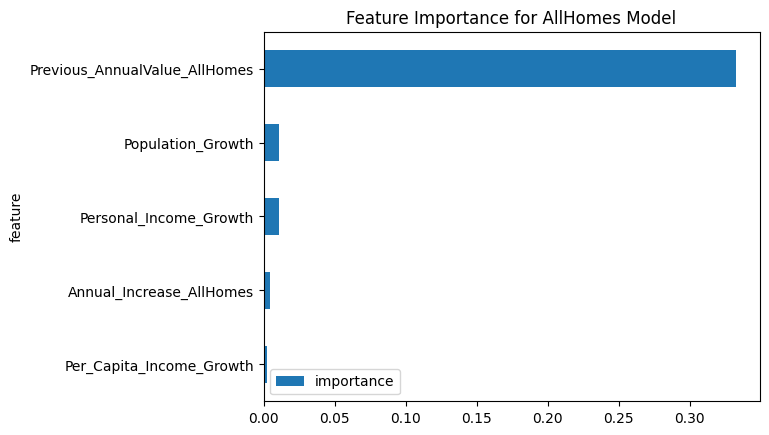

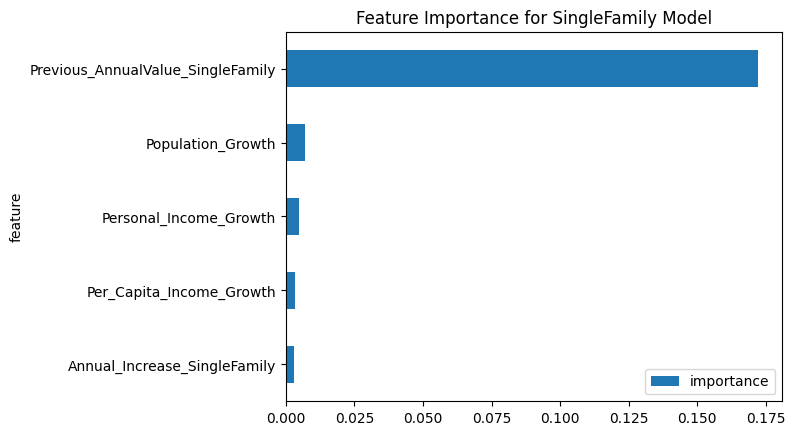

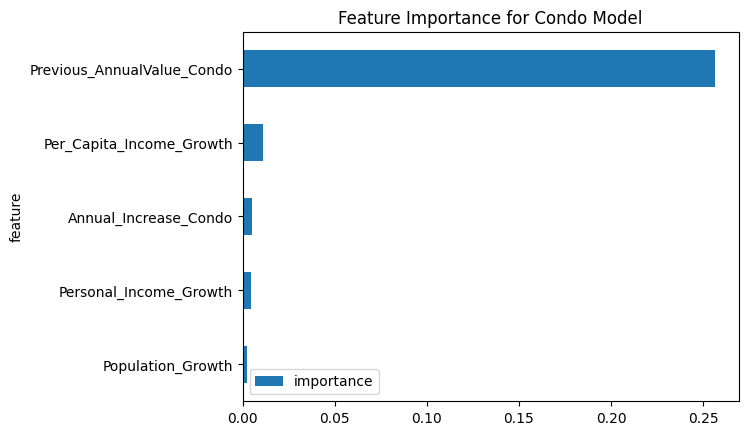

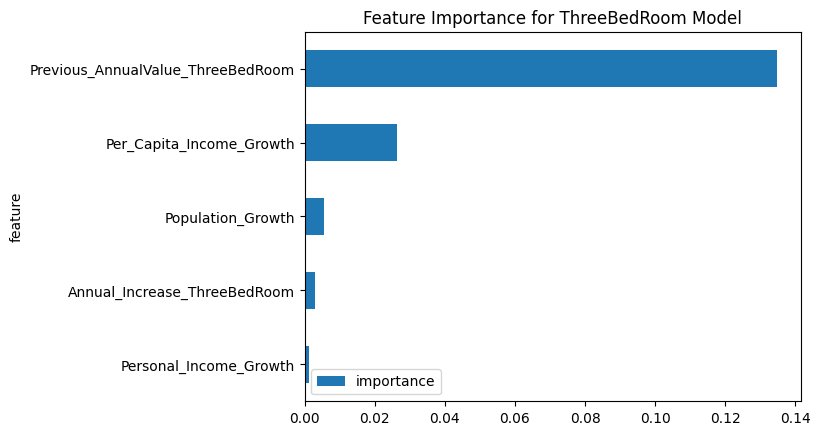

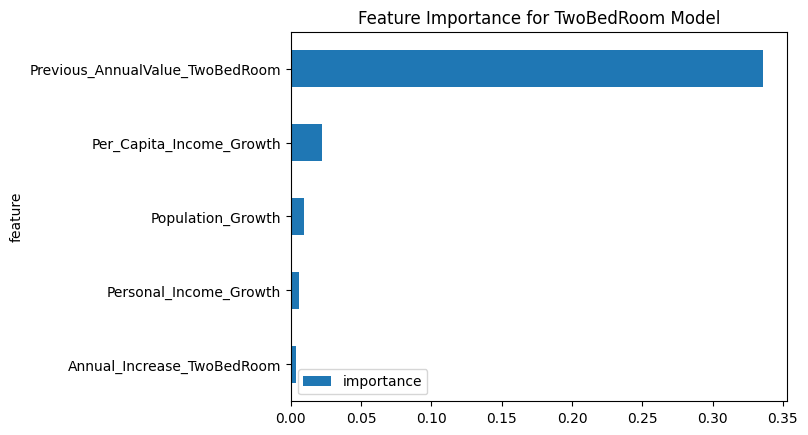

In [56]:
import matplotlib.pyplot as plt

    # Function to plot feature importance
def plot_feature_importance(model, columns_allhomes,title):
        feature_importance = model.feature_importances_
        fi = pd.DataFrame({'feature': columns_allhomes, 'importance': feature_importance})
        fi = fi.set_index('feature')
        fi_filtered = fi.drop(index=[col for col in fi.index if col.startswith('County') or col.startswith('State')])
        fi_filtered.sort_values('importance').plot(kind='barh', title=title)
        plt.show()

    # Plot feature importance for AllHomes model
plot_feature_importance(xgb_model_allhomes, X_train_allhomes.columns,'Feature Importance for AllHomes Model')
plot_feature_importance(xgb_model_singlefamily, X_train_singlefamily.columns,'Feature Importance for SingleFamily Model')
plot_feature_importance(xgb_model_condo, X_train_condo.columns,'Feature Importance for Condo Model')
plot_feature_importance(xgb_model_threebedroom, X_train_threebedroom.columns,'Feature Importance for ThreeBedRoom Model')
plot_feature_importance(xgb_model_twobedroom, X_train_twobedroom.columns,'Feature Importance for TwoBedRoom Model')

Build the Scattered Area Plot that shows how the price predictions alligned with 2020 to 2025 on Model Build . Increase/Decrease is consistent with prior years.

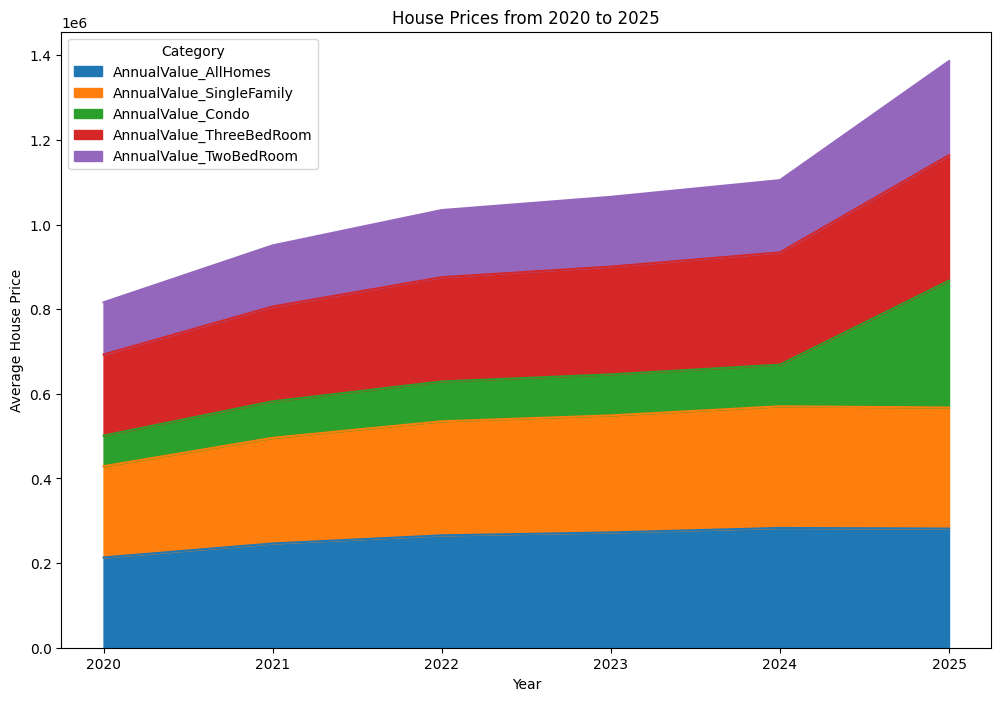

In [57]:
import matplotlib.pyplot as plt

# Filter the data for the years 2020 to 2025
years = [2020, 2021, 2022, 2023, 2024, 2025]
categories = ['AnnualValue_AllHomes', 'AnnualValue_SingleFamily', 'AnnualValue_Condo', 'AnnualValue_ThreeBedRoom', 'AnnualValue_TwoBedRoom']

# Create a new dataframe to hold the data for the plot
plot_data = pd.DataFrame(index=years, columns=categories)

# Populate the dataframe with the actual values for 2020 to 2024 and predicted values for 2025
for year in years:
    if year < 2025:
        year_data = zhvi_condo_fmt_df[zhvi_condo_fmt_df['Year_Recorded'] == year]
        for category in categories:
            plot_data.at[year, category] = year_data[category].mean()
    else:
        plot_data.at[year, 'AnnualValue_AllHomes'] = predictions_xgb_allhomes['Predicted_Value'].mean()
        plot_data.at[year, 'AnnualValue_SingleFamily'] = predictions_xgb_singlefamily['Predicted_Value'].mean()
        plot_data.at[year, 'AnnualValue_Condo'] = predictions_xgb_condo['Predicted_Value'].mean()
        plot_data.at[year, 'AnnualValue_ThreeBedRoom'] = predictions_xgb_threebedroom['Predicted_Value'].mean()
        plot_data.at[year, 'AnnualValue_TwoBedRoom'] = predictions_xgb_twobedroom['Predicted_Value'].mean()

# Convert the data to numeric type
plot_data = plot_data.astype(float)

# Plot the area plot
plot_data.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('House Prices from 2020 to 2025')
plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.legend(title='Category')
plt.show()

Build LGBM Model for the dataset. LGBM uses Gradient boosting method which constructs strong linear framework by sequentially adding weak learners in gradient manner.It uses a technique called "histogram-based algorithms" that efficiently handles categorical features by grouping them into bins.House prices are influenced by complex, non-linear relationships between the features such as Income Growth . LGBM helps in building an ensemble of decision trees allows to capture these non-linear relationships effectively.In Summary it can handle  categorical features, capture non-linear relationships

In [58]:
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error


def prepare_and_train_lgbm_model_with_cv(target_column):
        # Define features based on the target column
        if target_column == 'AnnualValue_AllHomes':
            features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                        'Annual_Increase_AllHomes', 'Previous_AnnualValue_AllHomes']
        elif target_column == 'AnnualValue_SingleFamily':
            features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                        'Annual_Increase_SingleFamily', 'Previous_AnnualValue_SingleFamily']
        elif target_column == 'AnnualValue_Condo':
            features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                        'Annual_Increase_Condo', 'Previous_AnnualValue_Condo']
        elif target_column == 'AnnualValue_ThreeBedRoom':
            features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                        'Annual_Increase_ThreeBedRoom', 'Previous_AnnualValue_ThreeBedRoom']
        elif target_column == 'AnnualValue_TwoBedRoom':
            features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                        'Annual_Increase_TwoBedRoom', 'Previous_AnnualValue_TwoBedRoom']

        # Filter the data for training (years 2020 to 2023)
        train_df = zhvi_condo_fmt_df[(zhvi_condo_fmt_df['Year_Recorded'] < 2024) & (zhvi_condo_fmt_df[target_column] != 0)][features + [target_column, 'Year_Recorded']]
        # Create a test dataframe for prediction (year 2025)
        test_df = zhvi_condo_fmt_df[(zhvi_condo_fmt_df['Year_Recorded'] == 2024) & (zhvi_condo_fmt_df[target_column] != 0)][features + [target_column, 'Year_Recorded']].copy()
        test_df['Year_Recorded'] = 2025

        X_train, y_train = train_df[features], train_df[target_column]
        X_test, y_test = test_df[features], test_df[target_column]

        # Convert categorical features to numeric using one-hot encoding
        X_train = pd.get_dummies(X_train)
        X_test = pd.get_dummies(X_test)
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Initialize the LightGBM Regressor
        lgbm_model = LGBMRegressor(
            subsample=0.8,
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42
        )

        # Implement K-Fold Cross-Validation
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
        cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        rmse_cv = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
        print(f"Cross-Validation RMSE for {target_column}: {rmse_cv.mean():.4f} (± {rmse_cv.std():.4f})")

        # Train the model on the entire training set
        lgbm_model.fit(X_train, y_train)

        # Prediction on test set
        y_pred = lgbm_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        print(f"RMSE on test set for {target_column}: {rmse:.4f}")
        print(f"MAE on test set for {target_column}: {mae:.4f}")

        predictions_df = test_df.copy()
        predictions_df['Predicted_Value'] = y_pred

        return lgbm_model, X_train, X_test, y_train, y_test, predictions_df

    # Train and predict with cross-validation
lgbm_model_allhomes, X_train_allhomes, X_test_allhomes, y_train_allhomes, y_test_allhomes, predictions_lgbm_allhomes = prepare_and_train_lgbm_model_with_cv('AnnualValue_AllHomes')
lgbm_model_singlefamily, X_train_singlefamily, X_test_singlefamily, y_train_singlefamily, y_test_singlefamily, predictions_lgbm_singlefamily = prepare_and_train_lgbm_model_with_cv('AnnualValue_SingleFamily')
lgbm_model_condo, X_train_condo, X_test_condo, y_train_condo, y_test_condo, predictions_lgbm_condo = prepare_and_train_lgbm_model_with_cv('AnnualValue_Condo')
lgbm_model_threebedroom, X_train_threebedroom, X_test_threebedroom, y_train_threebedroom, y_test_threebedroom, predictions_lgbm_threebedroom = prepare_and_train_lgbm_model_with_cv('AnnualValue_ThreeBedRoom')
lgbm_model_twobedroom, X_train_twobedroom, X_test_twobedroom, y_train_twobedroom, y_test_twobedroom, predictions_lgbm_twobedroom = prepare_and_train_lgbm_model_with_cv('AnnualValue_TwoBedRoom')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 7033, number of used features: 99
[LightGBM] [Info] Start training from score 248511.285899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Predictions for the first few records on lgbm model .

In [59]:

# Rearrange the columns in the dataframe
predictions_lgbm_allhomes[['County', 'State', 'Annual_Increase_AllHomes', 'AnnualValue_AllHomes', 'Predicted_Value', 
                     'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth','Previous_AnnualValue_AllHomes', 'Year_Recorded']].head(10)


,County,State,Annual_Increase_AllHomes,AnnualValue_AllHomes,Predicted_Value,Personal_Income_Growth,Population_Growth,Per_Capita_Income_Growth,Previous_AnnualValue_AllHomes,Year_Recorded
4,AUTAUGA,AL,4.00,"202,480.83","203,015.56",7.70,1.00,6.60,"194,390.83",2025
9,BALDWIN,AL,1.00,"349,517.88","349,129.36",8.80,2.80,5.80,"345,427.18",2025
14,BARBOUR,AL,2.00,"145,776.00","146,767.31",0.70,-0.50,1.20,"142,336.67",2025
19,BIBB,AL,3.00,"198,461.25","198,071.31",3.70,-0.50,4.30,"192,880.50",2025
24,BLOUNT,AL,3.00,"229,328.75","229,873.67",2.70,0.50,2.20,"222,670.75",2025
29,BULLOCK,AL,4.00,"98,247.00","99,311.38",5.30,-2.40,7.90,"94,135.00",2025
34,CALHOUN,AL,3.00,"172,181.64","172,249.71",5.40,0.60,4.80,"167,707.27",2025
39,CHAMBERS,AL,6.00,"167,467.80","168,755.79",3.00,-0.20,3.30,"158,687.40",2025
44,CHILTON,AL,3.00,"219,545.50","220,028.73",7.50,1.30,6.10,"212,586.50",2025
49,CLAY,AL,0.00,"136,710.00","136,590.86",-1.40,-0.50,-0.90,"136,073.00",2025


Identify MSE, MAE, Accuracy on Train and Test Datasets.
We are taking tolerance as 10% of actual vs predicted values for accuracy.

In [60]:
# Evaluate the model for 'AnnualValue_AllHomes'
results_lgbm_allhomes = evaluate_regression_model(
    lgbm_model_allhomes, X_train_allhomes, X_test_allhomes, y_train_allhomes, y_test_allhomes, 'AllHomes')

# Evaluate the model for 'AnnualValue_Condo'
results_lgbm_condo = evaluate_regression_model(
    lgbm_model_condo, X_train_condo, X_test_condo, y_train_condo, y_test_condo, 'Condo')

# Evaluate the model for 'AnnualValue_SingleFamily'
results_lgbm_singlefamily = evaluate_regression_model(
    lgbm_model_singlefamily, X_train_singlefamily, X_test_singlefamily, y_train_singlefamily, y_test_singlefamily, 'SingleFamily')

# Evaluate the model for 'AnnualValue_ThreeBedRoom'
results_lgbm_threebedroom = evaluate_regression_model(
    lgbm_model_threebedroom, X_train_threebedroom, X_test_threebedroom, y_train_threebedroom, y_test_threebedroom, 'ThreeBedRoom')

# Evaluate the model for 'AnnualValue_TwoBedRoom'
results_lgbm_twobedroom = evaluate_regression_model(
    lgbm_model_twobedroom, X_train_twobedroom, X_test_twobedroom, y_train_twobedroom, y_test_twobedroom, 'TwoBedRoom')

# Merge all results into one dataframe
lgbm_results_df = pd.concat([results_lgbm_allhomes, results_lgbm_condo, results_lgbm_singlefamily, results_lgbm_threebedroom, results_lgbm_twobedroom], ignore_index=True)
lgbm_results_df

,Category,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2,Test R2,Train Accuracy,Test Accuracy
0,AllHomes,"24,061.07","47,009.13","3,127.24","4,647.10",0.98,0.94,99.44,99.27
1,Condo,"9,749.16","20,505.35","3,107.68","4,507.24",1.00,0.98,99.62,99.72
2,SingleFamily,"60,962.15","110,589.57","5,014.38","7,382.35",0.92,0.81,98.73,98.63
3,ThreeBedRoom,"22,137.33","40,892.10","3,165.94","4,929.72",0.98,0.96,99.28,99.28
4,TwoBedRoom,"7,540.90","16,810.45","1,881.94","2,685.88",1.00,0.99,99.53,99.64


Build Elastic Net Model that does Price Forecast . Store the results.Elastic Net is a linear regression model that combines the L1 (Lasso) and L2 (Ridge) regularization techniques. it is used to prevent overfitting as well as Multicollenarity



In [61]:
import warnings
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, KFold

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Define the function to prepare and train the ElasticNet model with cross-validation
def prepare_and_train_elasticnet(target_column):
    if target_column == 'AnnualValue_AllHomes':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_AllHomes', 'Previous_AnnualValue_AllHomes']
    elif target_column == 'AnnualValue_SingleFamily':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_SingleFamily', 'Previous_AnnualValue_SingleFamily']
    elif target_column == 'AnnualValue_Condo':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_Condo', 'Previous_AnnualValue_Condo']
    elif target_column == 'AnnualValue_ThreeBedRoom':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_ThreeBedRoom', 'Previous_AnnualValue_ThreeBedRoom']
    elif target_column == 'AnnualValue_TwoBedRoom':
        features = ['County', 'State', 'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth',
                    'Annual_Increase_TwoBedRoom', 'Previous_AnnualValue_TwoBedRoom']

    # Filter the data for training (years 2020 to 2023)
    train_df = zhvi_condo_fmt_df[(zhvi_condo_fmt_df['Year_Recorded'] < 2024) & (zhvi_condo_fmt_df[target_column] != 0)][features + [target_column, 'Year_Recorded']]
    # Create a test dataframe for prediction (year 2025)
    test_df = zhvi_condo_fmt_df[(zhvi_condo_fmt_df['Year_Recorded'] == 2024) & (zhvi_condo_fmt_df[target_column] != 0)][features + [target_column, 'Year_Recorded']].copy()
    test_df['Year_Recorded'] = 2025

    X_train, y_train = train_df[features], train_df[target_column]
    X_test, y_test = test_df[features], test_df[target_column]

    # Convert categorical features to numeric using one-hot encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    # Scale the numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Elastic Net Regressor
    elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42) # tune alpha and l1_ratio

    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(elastic_net_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    print(f"Cross-validated RMSE for {target_column}: {cv_rmse_scores.mean():.4f} ± {cv_rmse_scores.std():.4f}")

    # Fit the model
    elastic_net_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = elastic_net_model.predict(X_test_scaled)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"RMSE for {target_column}: {rmse:.4f}")
    print(f"MAE for {target_column}: {mae:.4f}")

    predictions_df = test_df.copy()
    predictions_df['Predicted_Value'] = y_pred

    return elastic_net_model, X_train, X_test, y_train, y_test, predictions_df

# Train and predict for 'AnnualValue_AllHomes'
elastic_net_model_allhomes, X_train_allhomes, X_test_allhomes, y_train_allhomes, y_test_allhomes, predictions_allhomes_elastic = prepare_and_train_elasticnet('AnnualValue_AllHomes')

# Train and predict for 'AnnualValue_SingleFamily'
elastic_net_model_singlefamily, X_train_singlefamily, X_test_singlefamily, y_train_singlefamily, y_test_singlefamily, predictions_singlefamily_elastic = prepare_and_train_elasticnet('AnnualValue_SingleFamily')

# Train and predict for 'AnnualValue_Condo'
elastic_net_model_condo, X_train_condo, X_test_condo, y_train_condo, y_test_condo, predictions_condo_elastic = prepare_and_train_elasticnet('AnnualValue_Condo')

# Train and predict for 'AnnualValue_ThreeBedRoom'
elastic_net_model_threebedroom, X_train_threebedroom, X_test_threebedroom, y_train_threebedroom, y_test_threebedroom, predictions_threebedroom_elastic = prepare_and_train_elasticnet('AnnualValue_ThreeBedRoom')

# Train and predict for 'AnnualValue_TwoBedRoom'
elastic_net_model_twobedroom, X_train_twobedroom, X_test_twobedroom, y_train_twobedroom, y_test_twobedroom, predictions_twobedroom_elastic = prepare_and_train_elasticnet('AnnualValue_TwoBedRoom')


Cross-validated RMSE for AnnualValue_AllHomes: 52879.5121 ± 4927.6485
RMSE for AnnualValue_AllHomes: 55624.1904
MAE for AnnualValue_AllHomes: 31086.6282
Cross-validated RMSE for AnnualValue_SingleFamily: 65537.6676 ± 13958.0294
RMSE for AnnualValue_SingleFamily: 71837.7916
MAE for AnnualValue_SingleFamily: 33423.7914
Cross-validated RMSE for AnnualValue_Condo: 45472.4232 ± 3695.3809
RMSE for AnnualValue_Condo: 41670.5404
MAE for AnnualValue_Condo: 24924.8550
Cross-validated RMSE for AnnualValue_ThreeBedRoom: 54844.6303 ± 6429.6481
RMSE for AnnualValue_ThreeBedRoom: 55886.6574
MAE for AnnualValue_ThreeBedRoom: 29501.5258
Cross-validated RMSE for AnnualValue_TwoBedRoom: 41159.5726 ± 2117.5728
RMSE for AnnualValue_TwoBedRoom: 39474.3619
MAE for AnnualValue_TwoBedRoom: 23520.1118


In [62]:
pd.options.display.float_format = '{:,.2f}'.format

# Display the predictions for AllHomes using ElasticNet model
predictions_allhomes_elastic[['County', 'State', 'Annual_Increase_AllHomes', 'AnnualValue_AllHomes', 'Predicted_Value', 
                     'Personal_Income_Growth', 'Population_Growth', 'Per_Capita_Income_Growth','Previous_AnnualValue_AllHomes', 'Year_Recorded']].head(10)


,County,State,Annual_Increase_AllHomes,AnnualValue_AllHomes,Predicted_Value,Personal_Income_Growth,Population_Growth,Per_Capita_Income_Growth,Previous_AnnualValue_AllHomes,Year_Recorded
4,AUTAUGA,AL,4.00,"202,480.83","201,994.24",7.70,1.00,6.60,"194,390.83",2025
9,BALDWIN,AL,1.00,"349,517.88","299,731.53",8.80,2.80,5.80,"345,427.18",2025
14,BARBOUR,AL,2.00,"145,776.00","155,831.92",0.70,-0.50,1.20,"142,336.67",2025
19,BIBB,AL,3.00,"198,461.25","183,984.81",3.70,-0.50,4.30,"192,880.50",2025
24,BLOUNT,AL,3.00,"229,328.75","229,896.90",2.70,0.50,2.20,"222,670.75",2025
29,BULLOCK,AL,4.00,"98,247.00","107,619.08",5.30,-2.40,7.90,"94,135.00",2025
34,CALHOUN,AL,3.00,"172,181.64","176,711.79",5.40,0.60,4.80,"167,707.27",2025
39,CHAMBERS,AL,6.00,"167,467.80","177,833.29",3.00,-0.20,3.30,"158,687.40",2025
44,CHILTON,AL,3.00,"219,545.50","216,611.40",7.50,1.30,6.10,"212,586.50",2025
49,CLAY,AL,0.00,"136,710.00","156,292.34",-1.40,-0.50,-0.90,"136,073.00",2025


Out of all the 3 Models that I performed as part of this activity  ; prefer XGBOOST as it gives more accurate results as 99.82% of House Values are with in tolerance of Zillow Provided House Values.